# CLASSIFIER

In [1]:
import numpy as np
from consistent_plots import hist
import matplotlib.gridspec as gs
import matplotlib.pyplot as plt
from pandas import DataFrame
import seaborn as sns

Import input features.

In [3]:
filename = 'inputs/Reco_Inputs/nn_input_MX700_MY400_class.npz'
examples = np.load(filename)
for i,file in enumerate(examples.files):
    j = i + 1
    if j%3 > 0:
        print(f"{file:<17}", end='\t')
    else:
        print(file)

nonHiggs_indices 	X_train          	X_test
X_val            	x_train          	x_test
x_val            	y_train          	y_test
y_val            	m_train          	m_test
m_val            	train            	val
test             	train_pair_label 	val_pair_label
test_pair_label  	train_label      	val_label
test_label       	

In [4]:
X_train = examples['X_train']
X_test = examples['X_test']
X_val = examples['X_val']

print(len(X_train))
print(len(X_val))
print(len(X_test))

train = examples['train']
test = examples['test']
val = examples['val']

train_label = examples['train_label']
test_label = examples['test_label']
val_label = examples['val_label']

train_pair_label = examples['train_pair_label']
test_pair_label = examples['test_pair_label']
val_pair_label = examples['val_pair_label']

ntrain = int(len(train))
ntest = int(len(test))
nval = int(len(val))

nevents = ntrain + ntest + nval

105816
15120
75585


In [5]:
print(f"(nexamples, nfeatures) = {X_train.shape}") # (nexamples, nfeatures)

(nexamples, nfeatures) = (105816, 7)


In [6]:
X = np.vstack((X_train, X_val, X_test))
target = np.concatenate((train_label, val_label, test_label))
labels = np.concatenate((train_pair_label, val_pair_label, test_pair_label))

In [8]:
class_df = DataFrame({'Target':target, 'Pair':labels, 'b1 pT':X[:,0], 'b1 eta':X[:,1], 'b1 phi':X[:,2], 'b2 pT':X[:,3], 'b2 eta':X[:,4], 'b2 phi':X[:,5], 'b1 b2 dR':X[:,6]})
class_df.head()

,Target,Pair,b1 pT,b1 eta,b1 phi,b2 pT,b2 eta,b2 phi,b1 b2 dR
0,Higgs,HX,241.7500,0.427490,2.395996,119.2500,-0.027531,3.038574,0.787369
1,Higgs,HY1,105.3125,-0.645264,-2.375000,51.0625,0.433777,-1.324463,1.505974
2,Higgs,HY2,113.1250,0.208252,1.025635,43.0000,1.076416,-0.399414,1.668674
3,Non-Higgs,"X b2, Y1 b1",119.2500,-0.027531,3.038574,105.3125,-0.645264,-2.375000,1.066685
4,Non-Higgs,"X b2, Y2 b1",119.2500,-0.027531,3.038574,113.1250,0.208252,1.025635,2.026701


CPU times: user 4min 7s, sys: 3.66 s, total: 4min 11s
Wall time: 3min 54s


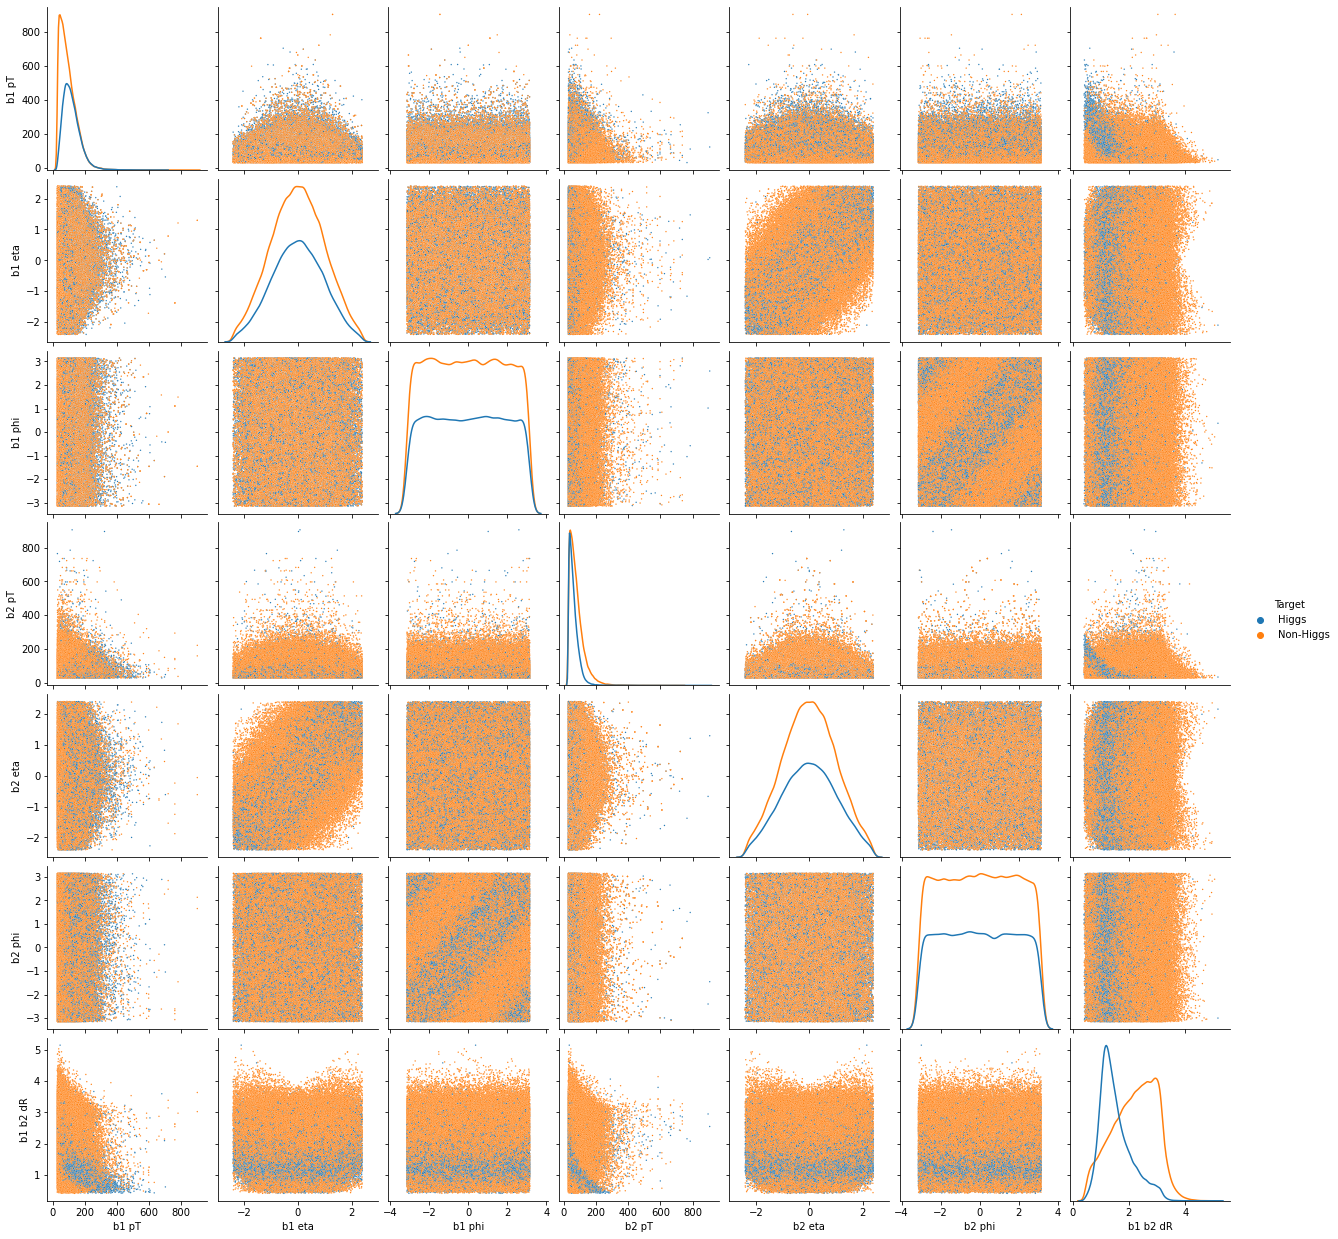

In [18]:
%%time
sns.pairplot(class_df, hue='Target', diag_kws=dict(fill=False), plot_kws={"s": 1})

In [9]:
class_df.corr().style.background_gradient()

,b1 pT,b1 eta,b1 phi,b2 pT,b2 eta,b2 phi,b1 b2 dR
b1 pT,1.000000,0.000139,-0.003033,-0.007048,-0.002265,-0.000577,-0.275924
b1 eta,0.000139,1.000000,-0.002140,-0.001165,0.455091,-0.000310,-0.002594
b1 phi,-0.003033,-0.002140,1.000000,-0.001133,-0.000430,-0.030374,-0.003553
b2 pT,-0.007048,-0.001165,-0.001133,1.000000,0.000191,0.001086,0.029211
b2 eta,-0.002265,0.455091,-0.000430,0.000191,1.000000,0.001721,0.000920
b2 phi,-0.000577,-0.000310,-0.030374,0.001086,0.001721,1.000000,0.001664
b1 b2 dR,-0.275924,-0.002594,-0.003553,0.029211,0.000920,0.001664,1.000000


In [10]:
HX_train = X_train[np.arange(0,len(X_train), 6),:]
HX_val = X_val[np.arange(0,len(X_val), 6),:]
HX_test = X_test[np.arange(0,len(X_test), 15),:]

HX_features = np.concatenate((HX_train, HX_val, HX_test))

In [12]:
HY1_train = X_train[np.arange(1,len(X_train), 6),:]
HY1_val = X_val[np.arange(1,len(X_val), 6),:]
HY1_test = X_test[np.arange(1,len(X_test), 15),:]
HY1_features = np.concatenate((HY1_train, HY1_val, HY1_test))

In [13]:
HY2_train = X_train[np.arange(2,len(X_train), 6),:]
HY2_val = X_val[np.arange(2,len(X_val), 6),:]
HY2_test = X_test[np.arange(2,len(X_test), 15),:]
HY2_features = np.concatenate((HY2_train, HY2_val, HY2_test))

In [14]:
print(HX_features[:5,0])
print(HY1_features[:5,0])
print(HY2_features[:5,0])

[241.75  172.125 199.    383.    134.75 ]
[105.3125  66.5    141.375  705.     184.25  ]
[113.125    75.3125   62.09375  50.78125  76.4375 ]


In [15]:
pt_bins = np.linspace(0,600,100)
eta_bins = np.linspace(-4,4,100)
phi_bins = np.linspace(-6.5,6.5,100)
m_bins = np.linspace(0,400,100)
dR_bins = np.linspace(0,7,100)

bins_dict = {0:pt_bins, 1:eta_bins, 2:phi_bins, 
             3:pt_bins, 4:eta_bins, 5:phi_bins, 
             6:dR_bins, 7:m_bins,  8:m_bins}
labels_dict = {0:r'$p_T$ [GeV]', 1:r'$\eta$', 2:r'$\phi$ [rad]', 
               3:r'$p_T$ [GeV]', 4:r'$\eta$', 5:r'$\phi$ [rad]', 
               6:r'$\Delta R$', 7:r'$m$ [GeV]',  8:r'$m$ [GeV]'}

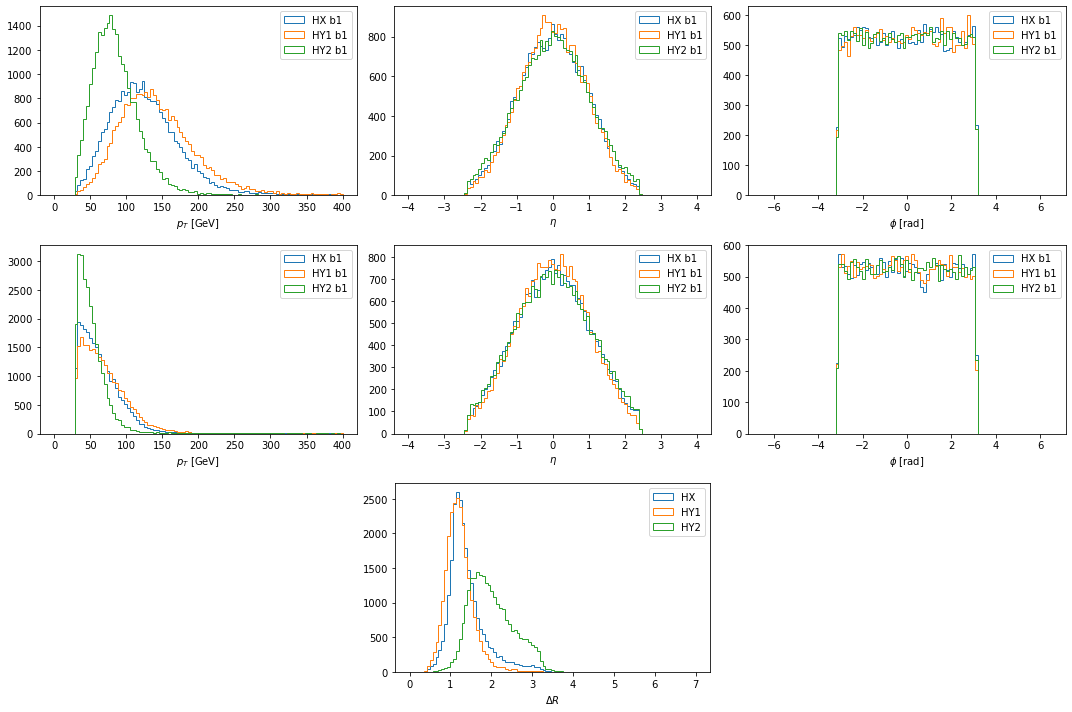

In [16]:
fig = plt.figure(figsize=(15,10))
grid = gs.GridSpec(nrows=3, ncols=3)

pt_bins = np.linspace(0,400,100)

ax = fig.add_subplot(grid[0, 0])
hist(ax, HX_features[:,0], bins=pt_bins, label='HX b1')
hist(ax, HY1_features[:,0],bins=pt_bins,   label='HY1 b1')
hist(ax, HY2_features[:,0],bins=pt_bins,  label='HY2 b1')
ax.set_xlabel(labels_dict[0])
ax.legend()

ax = fig.add_subplot(grid[0, 1])
hist(ax, HX_features[:,1],  bins=eta_bins,label='HX b1')
hist(ax, HY1_features[:,1], bins=eta_bins,  label='HY1 b1')
hist(ax, HY2_features[:,1], bins=eta_bins, label='HY2 b1')
ax.set_xlabel(labels_dict[1])
ax.legend()

ax = fig.add_subplot(grid[0, 2])
hist(ax, HX_features[:,2] , bins=phi_bins, label='HX b1')
hist(ax, HY1_features[:,2], bins=phi_bins,   label='HY1 b1')
hist(ax, HY2_features[:,2], bins=phi_bins,  label='HY2 b1')
ax.set_xlabel(labels_dict[2])
ax.legend()

ax = fig.add_subplot(grid[1, 0])
hist(ax, HX_features[:,3], bins=pt_bins,label='HX b1')
hist(ax, HY1_features[:,3],bins=pt_bins,  label='HY1 b1')
hist(ax, HY2_features[:,3],bins=pt_bins, label='HY2 b1')
ax.set_xlabel(labels_dict[0])
ax.legend()

ax = fig.add_subplot(grid[1, 1])
hist(ax, HX_features[:,4],  bins=eta_bins,label='HX b1')
hist(ax, HY1_features[:,4], bins=eta_bins,  label='HY1 b1')
hist(ax, HY2_features[:,4], bins=eta_bins, label='HY2 b1')
ax.set_xlabel(labels_dict[1])
ax.legend()

ax = fig.add_subplot(grid[1, 2])
hist(ax, HX_features[:,5] , bins=phi_bins,label='HX b1')
hist(ax, HY1_features[:,5], bins=phi_bins,  label='HY1 b1')
hist(ax, HY2_features[:,5], bins=phi_bins, label='HY2 b1')
ax.set_xlabel(labels_dict[2])
ax.legend()

ax = fig.add_subplot(grid[2, :])
hist(ax, HX_features[:,6] , bins=dR_bins, label='HX')
hist(ax, HY1_features[:,6], bins=dR_bins,   label='HY1')
hist(ax, HY2_features[:,6], bins=dR_bins,  label='HY2')
ax.set_xlabel(labels_dict[6])
ax.set_box_aspect(0.6)
ax.legend()

grid.tight_layout(fig)